# Data Analysis

In [2]:
import pandas as pd

## 1. Remove Duplicates from fact_events.csv

In [3]:
df_events = pd.read_csv("datasets/fact_events.csv")
df_events.head(5)

,event_id,store_id,campaign_id,product_code,base_price(before_promo),quantity_sold(before_promo),promo_type,base_price(after_promo),quantity_sold(after_promo)
0,8481be,STCHE-1,CAMP_DIW_01,P04,290,327.0,25% OFF,217,287
1,20618e,STCHE-3,CAMP_SAN_01,P04,370,379.0,BOGOF,185,1622
2,f30579,STBLR-9,CAMP_DIW_01,P02,860,337.0,33% OFF,576,488
3,4f570c,STBLR-7,CAMP_DIW_01,P05,55,122.0,25% OFF,41,107
4,6d153f,STHYD-5,CAMP_SAN_01,P15,3000,122.0,500 Cashback,2500,272


In [4]:
df_events.shape

(1510, 9)

### Check for duplicates based on store_id, campaign_id, and product_code

In [5]:
duplicates = df_events.duplicated(subset=['store_id', 'campaign_id', 'product_code'], keep='first')

In [6]:
num_duplicates = duplicates.sum()
print(f"Number of duplicates found: {num_duplicates}")

Number of duplicates found: 10


### Remove duplicates

In [7]:
df_events_cleaned = df_events[~duplicates]

In [8]:
df_events_cleaned.to_csv('cleaned_fact_events.csv', index=False)

In [9]:
print("Duplicates removed and cleaned dataset saved as 'cleaned_fact_events.csv'")

Duplicates removed and cleaned dataset saved as 'cleaned_fact_events.csv'


## 2. Cities which have more than 5 Stores

In [11]:
dim_stores = pd.read_csv("datasets/dim_stores.csv")
dim_stores.head(5)

,store_id,city
0,STTRV-0,Trivandrum
1,STMDU-3,Madurai
2,STHYD-6,Hyderabad
3,STVSK-1,Visakhapatnam
4,STCBE-3,Coimbatore


In [12]:
city_store_count = dim_stores.groupby('city').size()  # Group by city and count the number of stores in each city

In [13]:
cities_more_than_5_stores = city_store_count[city_store_count > 5]

In [14]:
num_cities = cities_more_than_5_stores.count()

In [15]:
print(f"Number of cities with more than 5 stores: {num_cities}")

Number of cities with more than 5 stores: 3


## 3. Fill missing values in quantity_sold (before_promo) | This result is with cleaned df_events

In [16]:
missing_values_count = df_events_cleaned['quantity_sold(before_promo)'].isnull().sum()
print(f"Number of missing values in 'quantity_sold(before_promo)': {missing_values_count}")

Number of missing values in 'quantity_sold(before_promo)': 20


In [17]:
median_quantity_sold = df_events_cleaned['quantity_sold(before_promo)'].median() # Calculate the median of quantity_sold(before_promo)

In [18]:
# Fill missing values with the median
df_events_cleaned.loc[:, 'quantity_sold(before_promo)'] = df_events_cleaned['quantity_sold(before_promo)'].fillna(median_quantity_sold)


In [19]:
missing_values_after = df_events_cleaned['quantity_sold(before_promo)'].isnull().sum()
filled_values = missing_values_count - missing_values_after

In [20]:
print(f"Number of missing values filled: {filled_values}")
print(f"Median used for imputation: {median_quantity_sold}")

Number of missing values filled: 20
Median used for imputation: 78.0


In [21]:
# Save the updated cleaned dataset in df_events_cleaned
df_events_cleaned.to_csv('fact_events_cleaned_filled.csv', index=False)
print("Cleaned dataset with missing values filled saved as 'fact_events_cleaned_filled.csv'")

Cleaned dataset with missing values filled saved as 'fact_events_cleaned_filled.csv'


## 3. Fill missing values in quantity_sold (before_promo) | This result is without cleaned df_events

In [22]:
df_events_raw = pd.read_csv('datasets/fact_events.csv')

# Step 1: Check how many missing values exist in 'quantity_sold(before_promo)'
missing_values_count = df_events_raw['quantity_sold(before_promo)'].isnull().sum()

# Step 2: Calculate the median for 'quantity_sold(before_promo)'
median_value = df_events_raw['quantity_sold(before_promo)'].median()

# Step 3: Fill missing values with the median using .loc to avoid SettingWithCopyWarning
df_events_raw.loc[:, 'quantity_sold(before_promo)'] = df_events_raw['quantity_sold(before_promo)'].fillna(median_value)

# Step 4: Report the results
print(f"Missing values filled: {missing_values_count}, Median used: {median_value}")

# Optional: Save the updated dataset if you want to review it
# df_events_raw.to_csv('updated_fact_events.csv', index=False)


Missing values filled: 20, Median used: 78.0


## 4. dentifytheproductcategorywiththelowestbasepricebeforethepromotion.

In [23]:
dim_products = pd.read_csv("datasets/dim_products.csv")
dim_products.head(5)

,product_code,product_name,category
0,P01,Atliq_Masoor_Dal (1KG),Grocery & Staples
1,P02,Atliq_Sonamasuri_Rice (10KG),Grocery & Staples
2,P03,Atliq_Suflower_Oil (1L),Grocery & Staples
3,P04,Atliq_Farm_Chakki_Atta (1KG),Grocery & Staples
4,P05,Atliq_Scrub_Sponge_For_Dishwash,Home Care


In [24]:
# Merge df_events_cleaned with dim_products to get the category for each product
df_merged = pd.merge(df_events_cleaned, dim_products, on='product_code')

In [25]:
min_base_price_category = df_merged.loc[df_merged['base_price(before_promo)'].idxmin(), 'category']

In [26]:
print(f"The product category with the lowest base price before the promotion is: {min_base_price_category}")

The product category with the lowest base price before the promotion is: Personal Care


## 5. Total quantity sold after the promotion for the BOGOF promo type during the Diwali campaign.

In [27]:
dim_campaigns = pd.read_csv("datasets/dim_campaigns.csv")
dim_campaigns.head()

,campaign_id,campaign_name,start_date,end_date
0,CAMP_DIW_01,Diwali,12-11-2023,18-11-2023
1,CAMP_SAN_01,Sankranti,10-01-2024,16-01-2024


In [28]:
# Merge df_events_cleaned with dim_campaigns to get the campaign name
df_campaign_merged = pd.merge(df_events_cleaned, dim_campaigns, on='campaign_id')

In [29]:
# Filter for the Diwali campaign and BOGOF promo type
diwali_bogof = df_campaign_merged[(df_campaign_merged['campaign_name'] == 'Diwali') & 
                                  (df_campaign_merged['promo_type'] == 'BOGOF')]

In [30]:
total_quantity_sold_after_promo = diwali_bogof['quantity_sold(after_promo)'].sum()

In [31]:
print(f"Total quantity sold after the promotion for BOGOF promo type during the Diwali campaign: {total_quantity_sold_after_promo}")

Total quantity sold after the promotion for BOGOF promo type during the Diwali campaign: 34461


## 6. Store with the highest quantity sold after the promotion during the Diwali campaign.

In [32]:
diwali_campaign = df_campaign_merged[df_campaign_merged['campaign_name'] == 'Diwali']

In [33]:
store_highest_sold = diwali_campaign.loc[diwali_campaign['quantity_sold(after_promo)'].idxmax(), 'store_id']

In [34]:
print(f"The store with the highest quantity sold after the promotion during the Diwali campaign is: {store_highest_sold}")

The store with the highest quantity sold after the promotion during the Diwali campaign is: STCHE-4


## 7. Compare total quantities sold before and after the promotions for the Sankranti and Diwali campaigns.

In [35]:
sankranti_campaign = df_campaign_merged[df_campaign_merged['campaign_name'] == 'Sankranti']
diwali_campaign = df_campaign_merged[df_campaign_merged['campaign_name'] == 'Diwali']

In [36]:
# Calculate total quantities sold before and after promotions for both campaigns
sankranti_before = sankranti_campaign['quantity_sold(before_promo)'].sum()
sankranti_after = sankranti_campaign['quantity_sold(after_promo)'].sum()
diwali_before = diwali_campaign['quantity_sold(before_promo)'].sum()
diwali_after = diwali_campaign['quantity_sold(after_promo)'].sum()

In [37]:
# Calculate the percentage increase in sales
sankranti_increase = sankranti_after - sankranti_before
diwali_increase = diwali_after - diwali_before

In [38]:
if sankranti_increase > diwali_increase:
    print(f"Sankranti campaign saw a greater increase in sales with an increase of {sankranti_increase} units.")
else:
    print(f"Diwali campaign saw a greater increase in sales with an increase of {diwali_increase} units.")

Sankranti campaign saw a greater increase in sales with an increase of 154175.0 units.


## 8. Product with the highest Incremental Revenue Percentage (IR%) during the Sankranti campaign | With cleaned data as in seqeance continue from 1.

In [39]:
# Calculate revenue before and after promotion for each event
sankranti_campaign['revenue_before_promo'] = sankranti_campaign['quantity_sold(before_promo)'] * sankranti_campaign['base_price(before_promo)']
sankranti_campaign['revenue_after_promo'] = sankranti_campaign['quantity_sold(after_promo)'] * sankranti_campaign['base_price(after_promo)']



# Group by product_code to aggregate total revenue before and after promo
grouped_sankranti_revenue = sankranti_campaign.groupby('product_code').agg({
    'revenue_before_promo': 'sum',
    'revenue_after_promo': 'sum'
}).reset_index()



# Calculate IR% at the product level
grouped_sankranti_revenue['IR%'] = ((grouped_sankranti_revenue['revenue_after_promo'] - grouped_sankranti_revenue['revenue_before_promo']) / grouped_sankranti_revenue['revenue_before_promo']) * 100
grouped_sankranti_revenue['IR%'] = grouped_sankranti_revenue['IR%'].apply(lambda x: round(x, 2))


# Merge with df_products to get product names
grouped_sankranti_revenue_with_names = grouped_sankranti_revenue.merge(dim_products, on='product_code')

#sort
grouped_sankranti_revenue_with_names = grouped_sankranti_revenue_with_names.sort_values(by='IR%', ascending=False)



grouped_sankranti_revenue_with_names



C:\Users\surya\AppData\Local\Temp\ipykernel_30756\2170945988.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sankranti_campaign['revenue_before_promo'] = sankranti_campaign['quantity_sold(before_promo)'] * sankranti_campaign['base_price(before_promo)']
C:\Users\surya\AppData\Local\Temp\ipykernel_30756\2170945988.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sankranti_campaign['revenue_after_promo'] = sankranti_campaign['quantity_sold(after_promo)'] * sankranti_campaign['base_price(after_promo)']


,product_code,revenue_before_promo,revenue_after_promo,IR%,product_name,category
2,P03,3189600.0,6118500,91.83,Atliq_Suflower_Oil (1L),Grocery & Staples
14,P15,16185000.0,31027500,91.71,Atliq_Home_Essential_8_Product_Combo,Combo1
12,P13,1740550.0,3303125,89.77,Atliq_High_Glo_15W_LED_Bulb,Home Appliances
13,P14,4542060.0,8534850,87.91,Atliq_waterproof_Immersion_Rod,Home Appliances
3,P04,6813550.0,12779800,87.56,Atliq_Farm_Chakki_Atta (1KG),Grocery & Staples
7,P08,2485910.0,4649330,87.03,Atliq_Double_Bedsheet_set,Home Care
6,P07,583500.0,1065450,82.60,Atliq_Curtains,Home Care
0,P01,2108376.0,2011235,-4.61,Atliq_Masoor_Dal (1KG),Grocery & Staples
1,P02,18374760.0,17262720,-6.05,Atliq_Sonamasuri_Rice (10KG),Grocery & Staples
10,P11,373350.0,258970,-30.64,Atliq_Doodh_Kesar_Body_Lotion (200ML),Personal Care


In [40]:
#### Answer: Atliq_Suflower_Oil (1L),91.83

## 9. Store in Visakhapatnam with the lowest Incremental Sold Units Percentage (ISU%) during the Diwali campaign.

In [41]:
df_campaign_merged = df_events_cleaned.merge(dim_campaigns, on='campaign_id', how='left')
df_campaign_merged = df_campaign_merged.merge(dim_stores, on='store_id', how='left')

print(df_campaign_merged.columns)

Index(['event_id', 'store_id', 'campaign_id', 'product_code',
       'base_price(before_promo)', 'quantity_sold(before_promo)', 'promo_type',
       'base_price(after_promo)', 'quantity_sold(after_promo)',
       'campaign_name', 'start_date', 'end_date', 'city'],
      dtype='object')


In [42]:
diwali_vizag = df_campaign_merged[(df_campaign_merged['campaign_name'] == 'Diwali') & 
                                  (df_campaign_merged['city'] == 'Visakhapatnam')].copy()

In [43]:
# Calculate ISU% for each store
diwali_vizag['ISU%'] = ((diwali_vizag['quantity_sold(after_promo)'] - diwali_vizag['quantity_sold(before_promo)']) / 
                         diwali_vizag['quantity_sold(before_promo)']) * 100

In [44]:
store_lowest_isu = diwali_vizag.loc[diwali_vizag['ISU%'].idxmin(), 'store_id']
lowest_isu_value = diwali_vizag['ISU%'].min()

In [45]:
print(f"Store in Visakhapatnam with the lowest ISU% during the Diwali campaign is {store_lowest_isu} with ISU% of {lowest_isu_value}")

Store in Visakhapatnam with the lowest ISU% during the Diwali campaign is STVSK-4 with ISU% of -24.285714285714285


## 10. Identify the promo type with both negative IR% and ISU% during the Sankranti campaign

In [46]:
sankranti_campaign = df_campaign_merged[df_campaign_merged['campaign_name'] == 'Sankranti'].copy()

In [47]:
sankranti_campaign['IR%'] = ((sankranti_campaign['base_price(after_promo)'] * sankranti_campaign['quantity_sold(after_promo)']) - 
                             (sankranti_campaign['base_price(before_promo)'] * sankranti_campaign['quantity_sold(before_promo)'])) / \
                             (sankranti_campaign['base_price(before_promo)'] * sankranti_campaign['quantity_sold(before_promo)']) * 100

sankranti_campaign['ISU%'] = ((sankranti_campaign['quantity_sold(after_promo)'] - 
                               sankranti_campaign['quantity_sold(before_promo)']) / 
                               sankranti_campaign['quantity_sold(before_promo)']) * 100

In [48]:
negative_ir_isu = sankranti_campaign[(sankranti_campaign['IR%'] < 0) & (sankranti_campaign['ISU%'] < 0)]

In [49]:
promo_type_negative_ir_isu = negative_ir_isu['promo_type'].unique()

In [50]:
if len(promo_type_negative_ir_isu) > 0:
    print(f"Promo types with both negative IR% and ISU% during the Sankranti campaign: {promo_type_negative_ir_isu}")
else:
    print("No promo type had both negative IR% and ISU% during the Sankranti campaign.")

Promo types with both negative IR% and ISU% during the Sankranti campaign: ['25% OFF' '50% OFF']


# Data Visualization and Insights

__1. Visualize the number of stores in each city. Identify the city with the most stores__
 __and explain the distribution of stores across other cities. How does the number of__
 __stores in Bengaluru compare with those in Hyderabad and Chennai?__

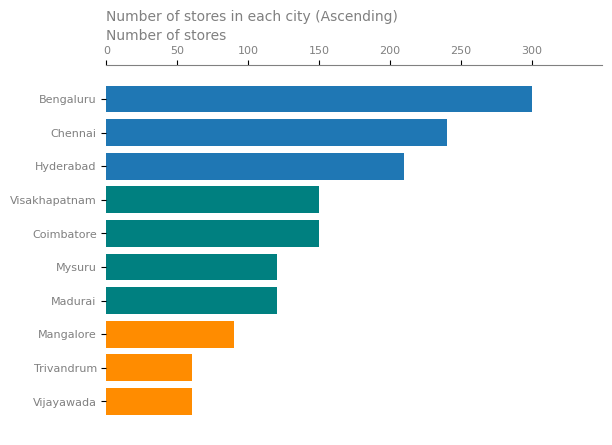

In [63]:
import matplotlib.pyplot as plt

# Sort the store counts by city in ascending order
store_counts = df_campaign_merged['city'].value_counts().sort_values(ascending=True)

# Define custom colors for different groups of bars
colors = ['darkorange'] * 3 + ['teal'] * 4 + ['#1f77b4'] * 3

# Plot the horizontal bar chart
plt.barh(store_counts.index, store_counts.values, color=colors)

# Title in top left (gray)
plt.title("Number of stores in each city (Ascending)", loc='left', color='gray', fontsize=10)

# X-axis label at top (gray) with font size 10 and left side
plt.xlabel("Number of stores", color='gray', loc='left', fontsize=10)
plt.gca().xaxis.set_label_position('top')  # Set x-axis label position to top

# Remove top and right borders
ax = plt.gca()  # Get current axes
ax.spines['top'].set_color('gray')
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Adjust x-axis limits (gray) and ticks (gray) with font size 8
plt.xlim(0, max(store_counts.values) + 50)  # Adjust x-axis limits
plt.gca().xaxis.tick_top()
plt.xticks(range(0, max(store_counts.values) + 50, 50), color='gray', fontsize=8)

# Adjust y-axis limits (gray) and ticks (gray) with font size 8
plt.ylim(-1, len(store_counts))  # Adjust y-axis limits
plt.yticks(range(len(store_counts)), store_counts.index, color='gray', fontsize=8)

plt.show()


Tier-1 cities  show the strongest market presence, while Tier-2 cities  maintain a moderate reach, and smaller cities have minimal store presence, indicating potential for expansion in these areas.

__2.Analyze the total quantity sold after promotion for the Sankranti campaign across
 different product categories. What percentage does each category contribute to
 the overall sales, and what insights can be drawn from these contributions?__

In [66]:
df_merged = pd.merge(df_campaign_merged, df_products, on='product_code')
df_merged.head()

,event_id,store_id,campaign_id,product_code,base_price(before_promo),quantity_sold(before_promo),promo_type,base_price(after_promo),quantity_sold(after_promo),campaign_name,start_date,end_date,city,product_name,category
0,8481be,STCHE-1,CAMP_DIW_01,P04,290,327.0,25% OFF,217,287,Diwali,12-11-2023,18-11-2023,Chennai,Atliq_Farm_Chakki_Atta (1KG),Grocery & Staples
1,20618e,STCHE-3,CAMP_SAN_01,P04,370,379.0,BOGOF,185,1622,Sankranti,10-01-2024,16-01-2024,Chennai,Atliq_Farm_Chakki_Atta (1KG),Grocery & Staples
2,f30579,STBLR-9,CAMP_DIW_01,P02,860,337.0,33% OFF,576,488,Diwali,12-11-2023,18-11-2023,Bengaluru,Atliq_Sonamasuri_Rice (10KG),Grocery & Staples
3,4f570c,STBLR-7,CAMP_DIW_01,P05,55,122.0,25% OFF,41,107,Diwali,12-11-2023,18-11-2023,Bengaluru,Atliq_Scrub_Sponge_For_Dishwash,Home Care
4,6d153f,STHYD-5,CAMP_SAN_01,P15,3000,122.0,500 Cashback,2500,272,Sankranti,10-01-2024,16-01-2024,Hyderabad,Atliq_Home_Essential_8_Product_Combo,Combo1


In [68]:
sankranti_campaign = df_merged[df_merged['campaign_name'] == 'Sankranti']
sankranti_campaign_category=sankranti_campaign.groupby('category')['quantity_sold(after_promo)'].sum()

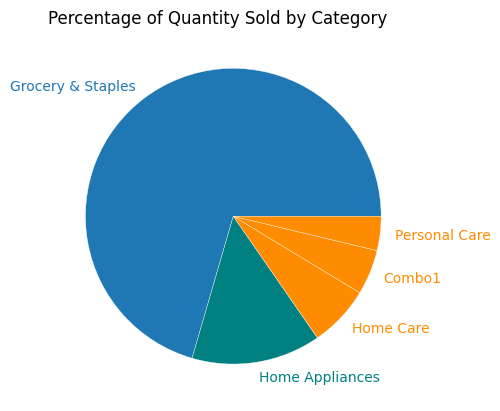

In [73]:
import matplotlib.pyplot as plt

# Calculate the total sum of 'quantity_sold_after_promo'
total_quantity = sankranti_campaign_category.sum()

# Calculate percentages for each category
percentages = sankranti_campaign_category / total_quantity * 100

# Sort data by percentage (descending order)
sorted_percentages = percentages.sort_values(ascending=False)

# Define colors: highest slice (#1f77b4), second-highest (teal), others (darkorange)
colors = ['#1f77b4', 'teal'] + ['darkorange'] * (len(sorted_percentages) - 2)

# Define explosion (if needed, you can adjust here)
explode = (0,) + (0,) + (0,) * (len(sorted_percentages) - 2)  # No explosion in this case

# Function to hide all percentages
def autopct_format(pct, allvals):
    return ''  # Hide percentage for all slices

# Create the pie chart
fig, ax = plt.subplots()
wedges, texts, autotexts = ax.pie(
    sorted_percentages,
    labels=sorted_percentages.index,  # Labels for all slices
    autopct=lambda pct: autopct_format(pct, sorted_percentages),
    colors=colors,
    explode=explode,
    wedgeprops={'edgecolor': 'white', 'linewidth': 0.25, 'antialiased': True},
    textprops={'color': 'gray'}  # Set text color to gray for percentages
)

# Set label colors
for i, text in enumerate(texts):
    if i == 0:  # Highest slice
        text.set_color('#1f77b4')  # Set label color to #1f77b4
    elif i == 1:  # Second-highest slice
        text.set_color('teal')  # Set label color to teal
    else:  # All other slices
        text.set_color('darkorange')  # Set label color to dark orange

# Set the title on the left side
plt.title('Percentage of Quantity Sold by Category', loc='left')

plt.show()


Grocery & Staples account for 70.5% of total sales, reflecting strong demand for essential items. Home Care contributes 14.1%, highlighting significant demand for cleaning and hygiene products. The remaining categories show moderate demand.


__4.Analyze the distribution of quantity sold before the promotion for each product
 category (Grocery & Staples, Home Care, Personal Care, Home Appliances,
 etc.). What patterns or trends do you observe across these categories, and how
 could these insights inform future promotional strategies?__

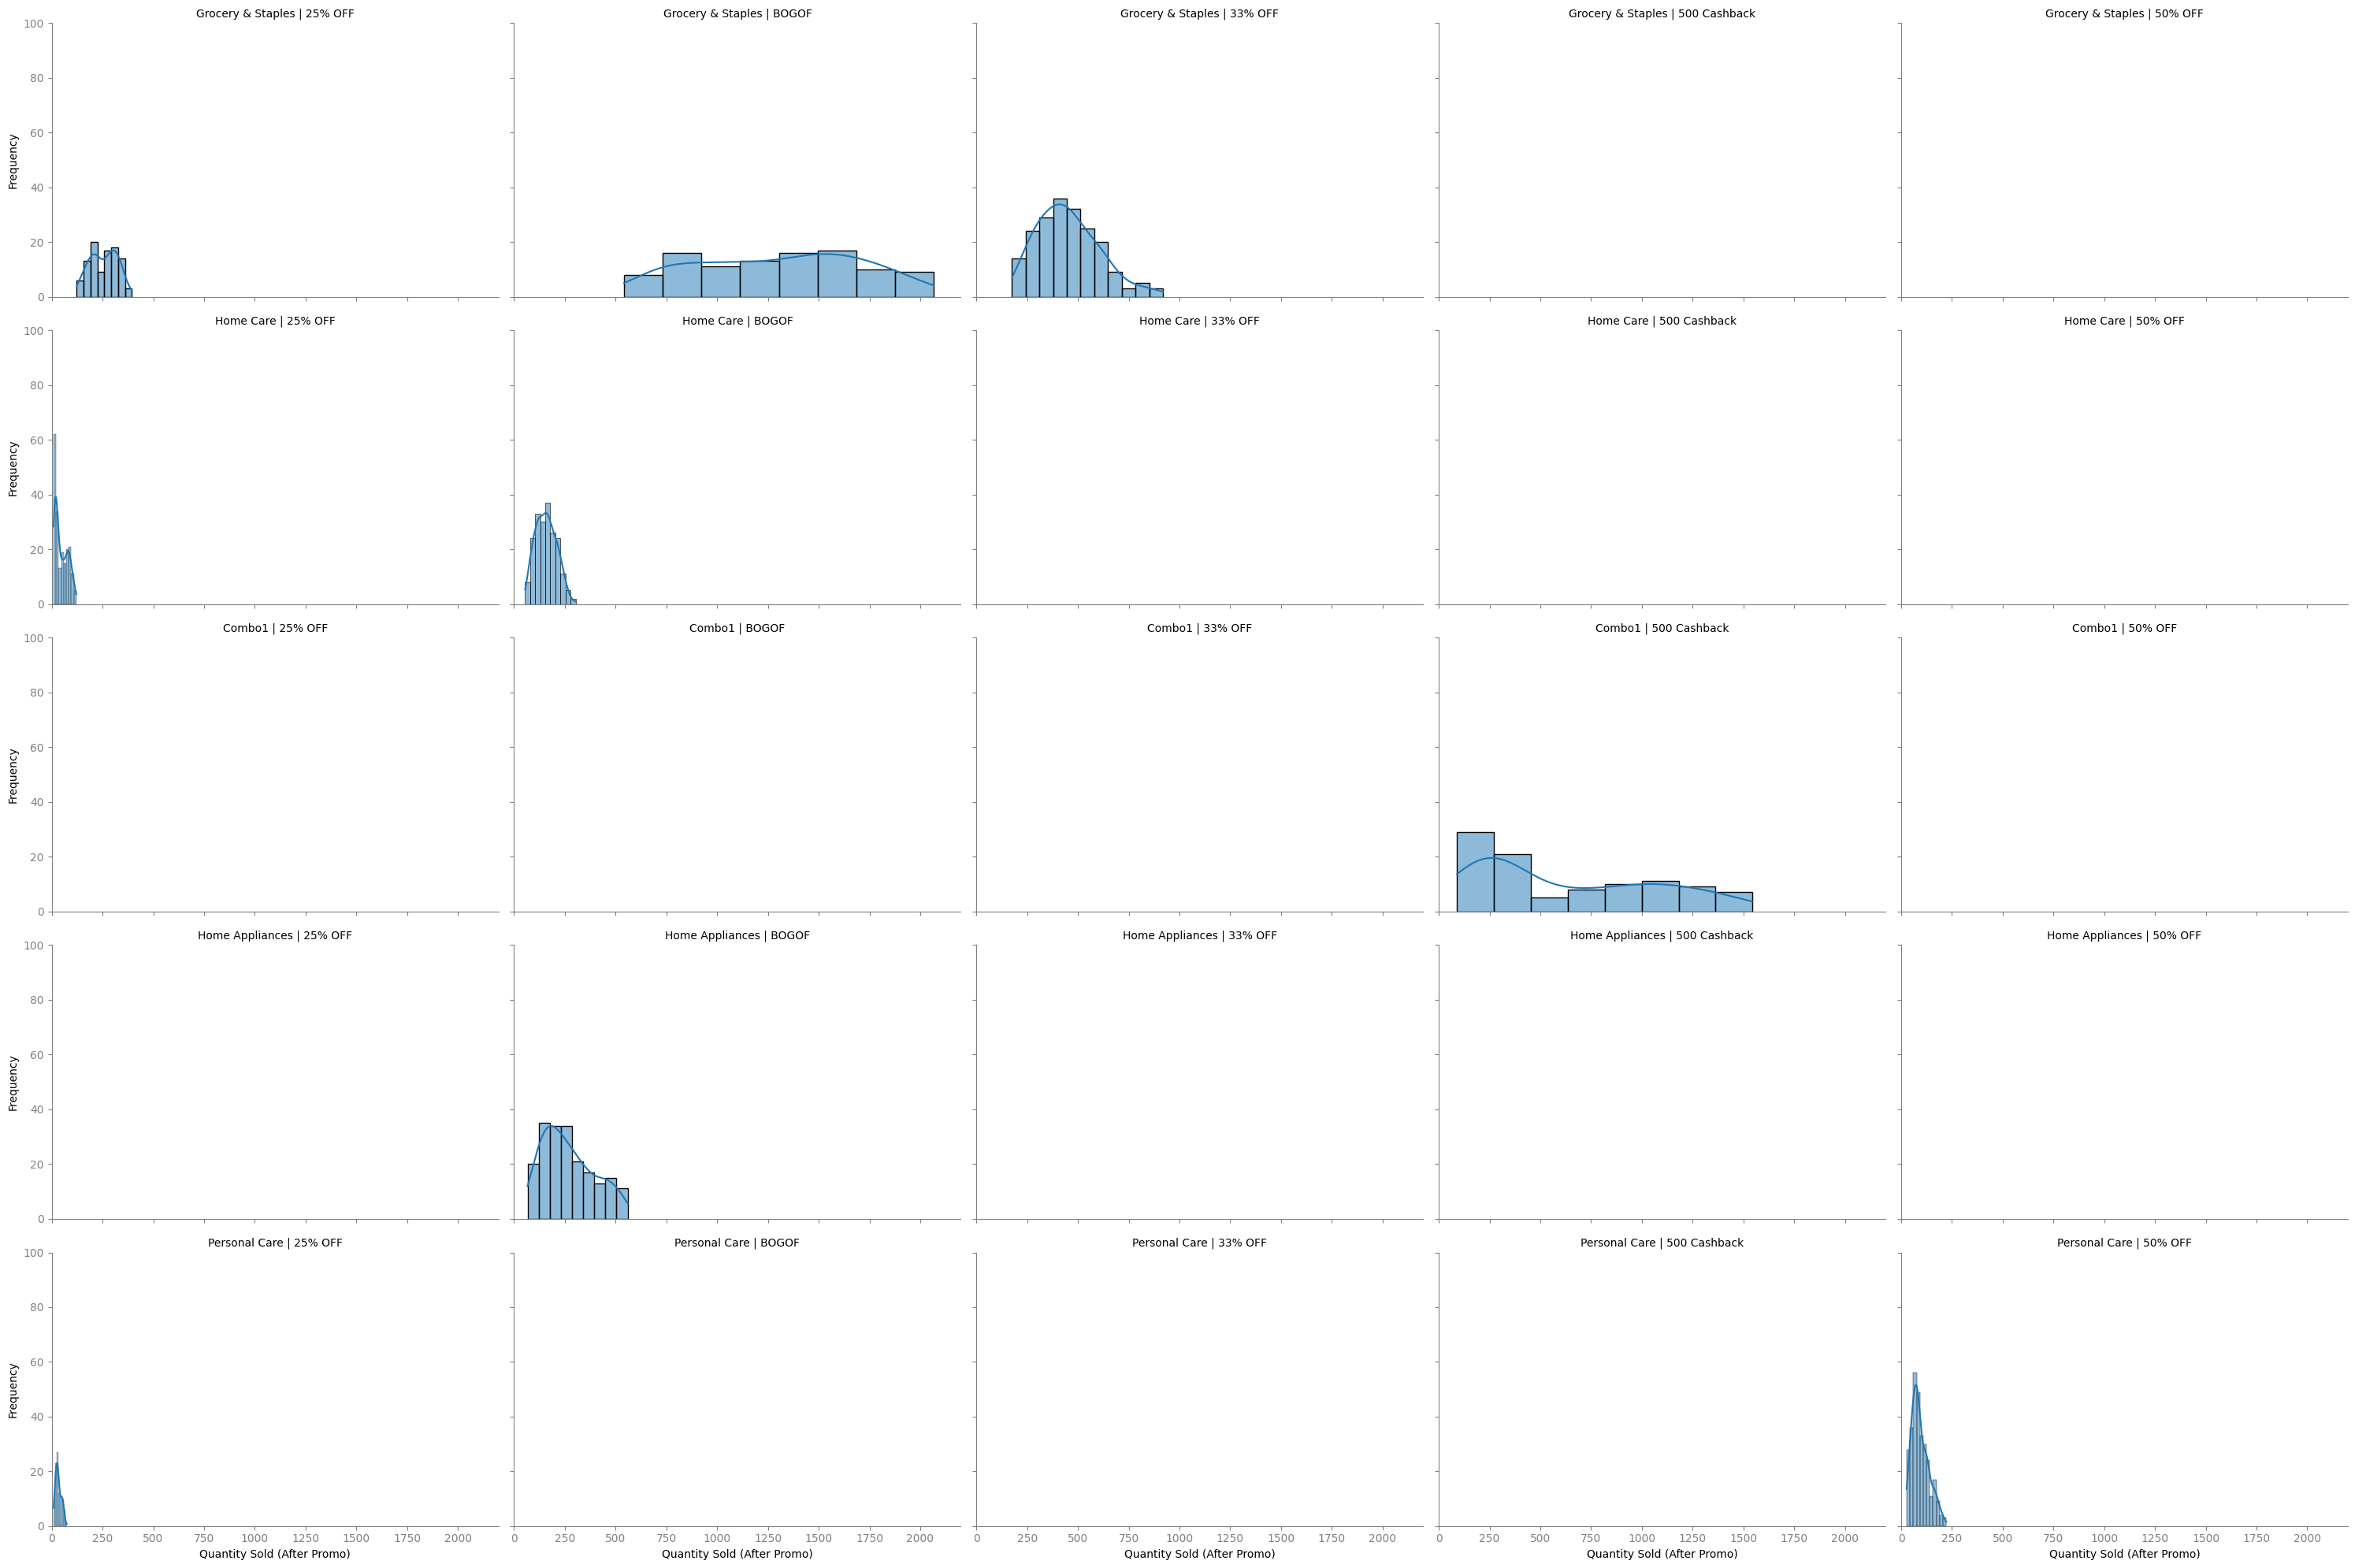

In [119]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df_merged is your DataFrame

# Create a FacetGrid to visualize the quantity sold after promo for each promo_type and category
g = sns.FacetGrid(df_merged, col='promo_type', row='category', height=4, aspect=1.5)

# Map histograms of 'quantity_sold(after_promo)' for each category and promo_type
g.map(sns.histplot, 'quantity_sold(after_promo)', kde=True)

# Set axis labels for each subplot
g.set_axis_labels('Quantity Sold (After Promo)', 'Frequency')

# Set axis limits for each subplot
g.set(xlim=(0,2200), ylim=(0, 100))  # Set the x and y limits

# Add a title for each facet (individual plots)
g.set_titles(col_template="{col_name}", row_template="{row_name}")

# Customize the color of the spines (axes borders) to grey
for ax in g.axes.flat:
    # Set spines (axes borders) color to grey
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_color('grey')
    ax.spines['bottom'].set_color('grey')
    
    # Set the ticks (numbers along axes) color to grey
    ax.tick_params(axis='x', colors='grey')
    ax.tick_params(axis='y', colors='grey')

# Adjust the layout to make it more readable
g.fig.tight_layout()

# Display the plot
plt.show()

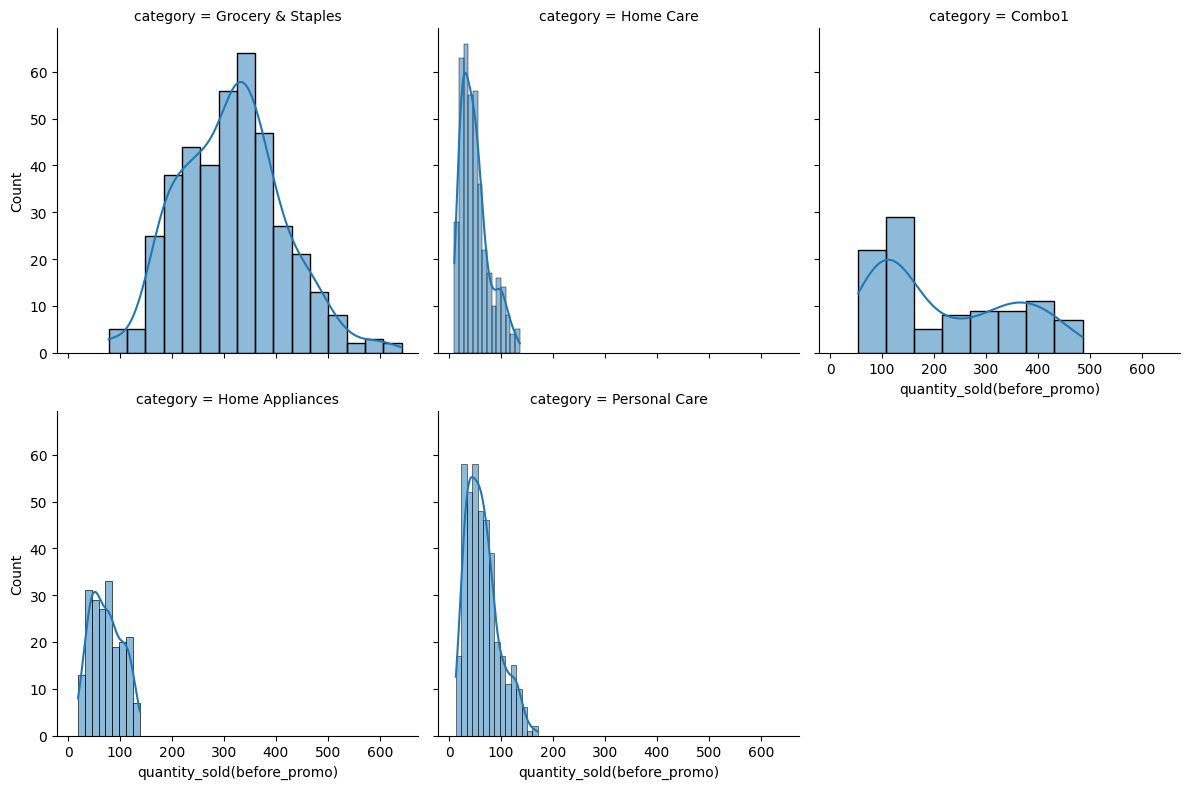

In [81]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df_merged is your DataFrame
# Use a FacetGrid to plot histograms for each category side by side in 3 columns
g = sns.FacetGrid(df_merged, col='category', col_wrap=3, height=4)

# Map the histplot for each category
g.map(sns.histplot, 'quantity_sold(before_promo)', kde=True)

# Customize the layout and spacing
g.fig.tight_layout()

# Show the plots
plt.show()


Groceries and Staples show a strong, balanced performance in both sales and quantity, even before promotions
Personal Care and Home Care categories are right-skewed, indicating higher sales for lower-cost items.
 Home Appliances have the lowest demand in both sales and quantity. 
Interestingly, the Combo1 category exhibits a bimodal distribution, with high sales occurring at both low and high quantities, suggesting two distinct consumer groups

__5.Analyze the incremental sold units percentage (ISU%) across various cities.
 Identify the city with the highest ISU% after the promotion and the city with the
 smallest change. What trends can be observed about the effectiveness of
promotions in driving sales across these cities__

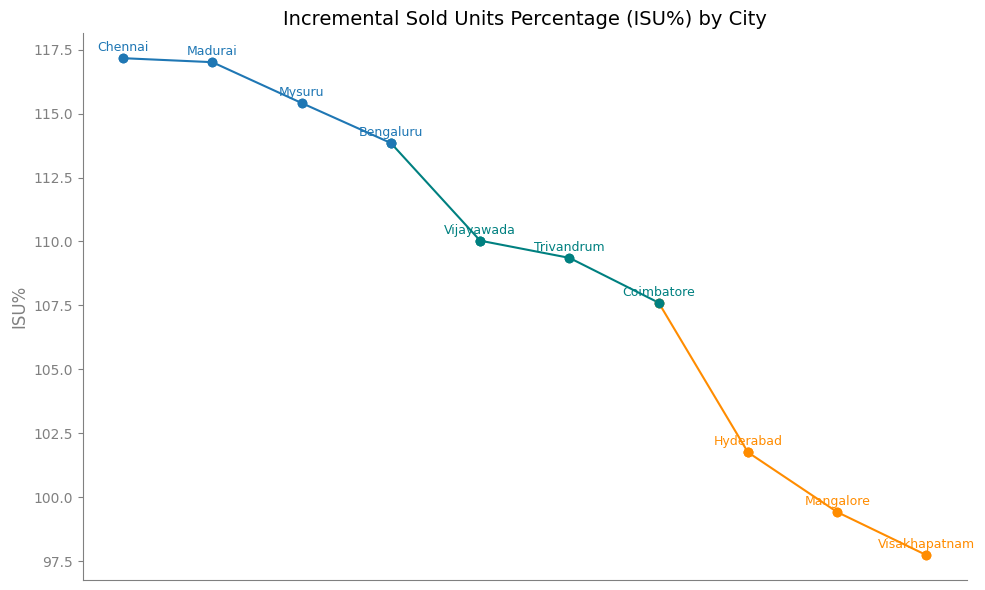

In [91]:
import matplotlib.pyplot as plt

# Calculate ISU% for each city
df_merged['ISU%'] = ((df_merged['quantity_sold(after_promo)'] - df_merged['quantity_sold(before_promo)']) / df_merged['quantity_sold(before_promo)']) * 100

city_isu = df_merged.groupby('city')['ISU%'].mean().reset_index()

# Sort cities by ISU% in descending order for better visualization
city_isu = city_isu.sort_values('ISU%', ascending=False)

# List of cities to highlight in blue
highlight_cities = ['Chennai', 'Madurai', 'Mysuru', 'Bengaluru']

# List of cities to highlight in teal
teal_cities = ['Vijayawada', 'Trivandrum', 'Coimbatore']

# List of cities to highlight in dark orange
dark_orange_cities = ['Hyderabad', 'Mangalore', 'Visakhapatnam']

# Create a line chart
plt.figure(figsize=(10, 6))

# Plot the line connecting all data points (set color to white for all points)
plt.plot(city_isu['city'], city_isu['ISU%'], marker='o', linestyle='-', color='white')

# Plot the line connecting the highlighted cities in #1f77b4 (blue)
highlight_data = city_isu[city_isu['city'].isin(highlight_cities)]  # Filter data for highlighted cities
plt.plot(highlight_data['city'], highlight_data['ISU%'], marker='o', linestyle='-', color='#1f77b4', label='Highlighted Cities')  # Line for highlighted cities

# Plot the line connecting the teal cities in teal
teal_data = city_isu[city_isu['city'].isin(teal_cities)]  # Filter data for teal cities
plt.plot(teal_data['city'], teal_data['ISU%'], marker='o', linestyle='-', color='teal', label='Teal Cities')  # Line for teal cities

# Plot the line connecting the dark orange cities in dark orange
dark_orange_data = city_isu[city_isu['city'].isin(dark_orange_cities)]  # Filter data for dark orange cities
plt.plot(dark_orange_data['city'], dark_orange_data['ISU%'], marker='o', linestyle='-', color='darkorange', label='Dark Orange Cities')  # Line for dark orange cities

# Plot the line connecting Coimbatore to Hyderabad in dark orange
coimbatore_hyderabad = city_isu[city_isu['city'].isin(['Coimbatore', 'Hyderabad'])]
plt.plot(coimbatore_hyderabad['city'], coimbatore_hyderabad['ISU%'], marker='o', linestyle='-', color='darkorange')  # Connecting Coimbatore to Hyderabad in dark orange

# Plot the line connecting Bengaluru to Vijayawada in teal
bengaluru_vijayawada = city_isu[city_isu['city'].isin(['Bengaluru', 'Vijayawada'])]
plt.plot(bengaluru_vijayawada['city'], bengaluru_vijayawada['ISU%'], marker='o', linestyle='-', color='teal')  # Connecting Bengaluru to Vijayawada in teal

# Highlight specific cities' points and labels
for i, city in enumerate(city_isu['city']):
    if city in highlight_cities:  # Highlighted cities in blue
        plt.plot(city_isu['city'].iloc[i], city_isu['ISU%'].iloc[i], marker='o', color='#1f77b4')  # Plot in blue
        plt.annotate(city, 
                     (i, city_isu['ISU%'].iloc[i]), 
                     textcoords="offset points", xytext=(0,5), ha='center', fontsize=9, color='#1f77b4')  # Label in blue
    elif city in teal_cities:  # Teal cities (including Trivandrum)
        plt.plot(city_isu['city'].iloc[i], city_isu['ISU%'].iloc[i], marker='o', color='teal')  # Plot in teal
        plt.annotate(city, 
                     (i, city_isu['ISU%'].iloc[i]), 
                     textcoords="offset points", xytext=(0,5), ha='center', fontsize=9, color='teal')  # Label in teal
    elif city in dark_orange_cities:  # Dark orange cities
        plt.plot(city_isu['city'].iloc[i], city_isu['ISU%'].iloc[i], marker='o', color='darkorange')  # Plot in dark orange
        plt.annotate(city, 
                     (i, city_isu['ISU%'].iloc[i]), 
                     textcoords="offset points", xytext=(0,5), ha='center', fontsize=9, color='darkorange')  # Label in dark orange
    else:
        plt.plot(city_isu['city'].iloc[i], city_isu['ISU%'].iloc[i], marker='o', color='white')  # Plot in white
        plt.annotate(city, 
                     (i, city_isu['ISU%'].iloc[i]), 
                     textcoords="offset points", xytext=(0,5), ha='center', fontsize=9, color='white')  # Label in white

# Add y-axis label and title
plt.ylabel('ISU%', fontsize=12, color='grey')  # Set y-axis label color to grey
plt.title('Incremental Sold Units Percentage (ISU%) by City', fontsize=14)

# Customize the y-axis limits and tick labels color
plt.gca().tick_params(axis='y', colors='grey')  # Set y-axis ticks and labels to grey
plt.gca().spines['left'].set_color('grey')      # Set the left border (y-axis) to grey

# Remove x-axis (no labels, no ticks, no limits)
plt.gca().xaxis.set_visible(False)

# Remove top, right, and bottom borders (spines)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_color('grey')

# Show the plot
plt.tight_layout()  # Ensure everything fits without overlap
plt.show()


The effectiveness of the promotion varied across cities

__6.Analyze the relationship between incremental revenue and incremental sold units
 for different promotion types in Hyderabad. Which promotion type led to the
 highest incremental sold units, and which one generated the highest incremental
 revenue? What insights can you draw from the balance between the two metrics
 for this city?__

C:\Users\surya\AppData\Local\Temp\ipykernel_30756\748867460.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_hyderabad['incremental_revenue'] = (df_hyderabad['quantity_sold(after_promo)'] * df_hyderabad['base_price(after_promo)']) - (df_hyderabad['quantity_sold(before_promo)'] * df_hyderabad['base_price(before_promo)'])
C:\Users\surya\AppData\Local\Temp\ipykernel_30756\748867460.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_hyderabad['incremental_sold_units'] = df_hyderabad['quantity_sold(af

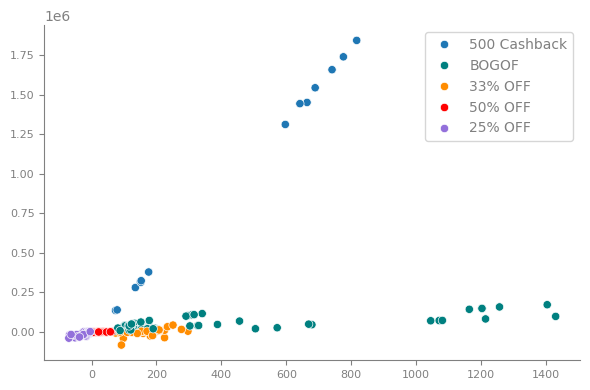

In [108]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Filter data for Hyderabad
df_hyderabad = df_merged[df_merged['city'] == 'Hyderabad']

# Calculate incremental revenue and sold units
df_hyderabad['incremental_revenue'] = (df_hyderabad['quantity_sold(after_promo)'] * df_hyderabad['base_price(after_promo)']) - (df_hyderabad['quantity_sold(before_promo)'] * df_hyderabad['base_price(before_promo)'])
df_hyderabad['incremental_sold_units'] = df_hyderabad['quantity_sold(after_promo)'] - df_hyderabad['quantity_sold(before_promo)']

# Group by promotion type and calculate mean incremental revenue and sold units
promo_metrics = df_hyderabad.groupby('promo_type')[['incremental_revenue', 'incremental_sold_units']].mean().reset_index()

# Define the color palette for each promotion type
palette = {
    '33% OFF': 'darkorange',   # Dark orange for 33% OFF
    '25% OFF': 'mediumpurple', # Medium purple for 25% OFF
    '50% OFF': 'red',          # Red for 50% OFF
    '500 Cashback': '#1f77b4', # Blue for 500 Cashback
    'BOGOF': 'teal',          # Teal for BOGOF
}

# Add Gainsboro color for all other promotions that are not listed
for promo in df_hyderabad['promo_type'].unique():
    if promo not in palette:
        palette[promo] = 'Gainsboro'  # Light gray for all other promotions

# Visualize the relationship between incremental revenue and sold units for different promotion types
plt.figure(figsize=(6, 4))
scatter = sns.scatterplot(x='incremental_sold_units', y='incremental_revenue', hue='promo_type', data=df_hyderabad, palette=palette)

# Customize the font size of axis ticks to be smaller
plt.tick_params(axis='both', labelsize=8)

# Customize the y-axis limits and tick labels color
plt.gca().tick_params(axis='x', colors='grey')  # Set x-axis ticks and labels to grey
plt.gca().spines['bottom'].set_color('grey')  

plt.gca().tick_params(axis='y', colors='grey')  # Set y-axis ticks and labels to grey
plt.gca().spines['left'].set_color('grey')      # Set the left border (y-axis) to grey

# Set the borders (spines) color to grey
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_color('grey')
plt.gca().spines['bottom'].set_color('grey')

# Remove axis labels
plt.xlabel('')  # Remove x-axis label
plt.ylabel('')  # Remove y-axis label

# Create the legend and set its text color to gray
legend = plt.legend()
plt.setp(legend.get_texts(), color='gray')  # Set the text color of the legend to gray

# Display the plot
plt.tight_layout()
plt.show()


cashback promotions are highly effective in driving both sales and revenue in Hyderabad ( X axix - ISU , Y axix - IR )

 __7.Analyze the revenue before and after promotions across different product
 categories in Bengaluru. What trends can be identified in the performance of
 each category, and how did promotions impact overall revenue in the city__

C:\Users\surya\AppData\Local\Temp\ipykernel_30756\3043646327.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bengaluru['revenue_before_promo'] = df_bengaluru['base_price(before_promo)'] * df_bengaluru['quantity_sold(before_promo)']
C:\Users\surya\AppData\Local\Temp\ipykernel_30756\3043646327.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bengaluru['revenue_after_promo'] = df_bengaluru['base_price(after_promo)'] * df_bengaluru['quantity_sold(after_promo)']


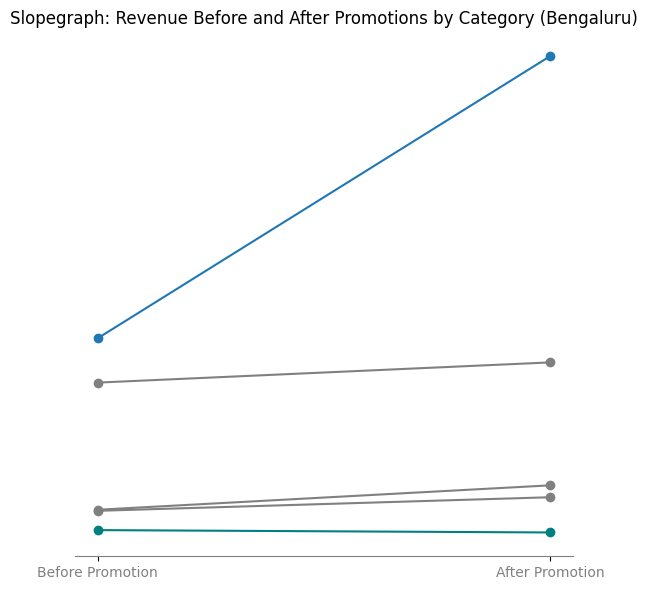

In [100]:
import pandas as pd
import matplotlib.pyplot as plt

# Filter data for Bengaluru
df_bengaluru = df_merged[df_merged['city'] == 'Bengaluru']

# Calculate revenue before and after promotions for each category
df_bengaluru['revenue_before_promo'] = df_bengaluru['base_price(before_promo)'] * df_bengaluru['quantity_sold(before_promo)']
df_bengaluru['revenue_after_promo'] = df_bengaluru['base_price(after_promo)'] * df_bengaluru['quantity_sold(after_promo)']

# Group by category and calculate total revenue before and after promotions
category_revenue = df_bengaluru.groupby('category')[['revenue_before_promo', 'revenue_after_promo']].sum().reset_index()

# Create a dataframe for plotting the slopegraph
df_slope = pd.melt(category_revenue, id_vars='category', var_name='Period', value_name='Revenue')

# Plot the slopegraph
plt.figure(figsize=(6,6))

# Loop through each category to plot lines between before and after promotion revenues
for category in category_revenue['category']:
    before_revenue = category_revenue[category_revenue['category'] == category]['revenue_before_promo'].values[0]
    after_revenue = category_revenue[category_revenue['category'] == category]['revenue_after_promo'].values[0]
    
    # Set custom colors for specific categories
    if category == 'Combo1':
        color = '#1f77b4'  # Blue for Combo1
    elif category == 'Grocery & Staples':
        color = 'gray'     # Teal for Grocery & Staples
    elif category == 'Personal Care':
        color = 'teal'  # Dark orange for Personal Care
    else:
        color = 'gray'  # Default color for other categories

    # Plot the line for the category with data points (markers)
    plt.plot([0, 1], [before_revenue, after_revenue], marker='o', color=color)

# Add x-tick labels for "Before" and "After" in grey
plt.xticks([0, 1], ['Before Promotion', 'After Promotion'], color='grey')

# Add axis labels and title
plt.title('Slopegraph: Revenue Before and After Promotions by Category (Bengaluru)')

# Remove the axis spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_color('grey')
plt.gca().spines['left'].set_visible(False)

# Remove y-axis ticks and labels for a cleaner look
plt.yticks([])

plt.tight_layout()
plt.show()


The revenue has increased for most categories after the promotions. This indicates that the promotional strategies were effective in city

__3.Examine the correlation between base price (after the promotion) and sales
 quantities (after the promotion). What insights can be drawn regarding the
 relationship between base price and sales quantities after the promotion__

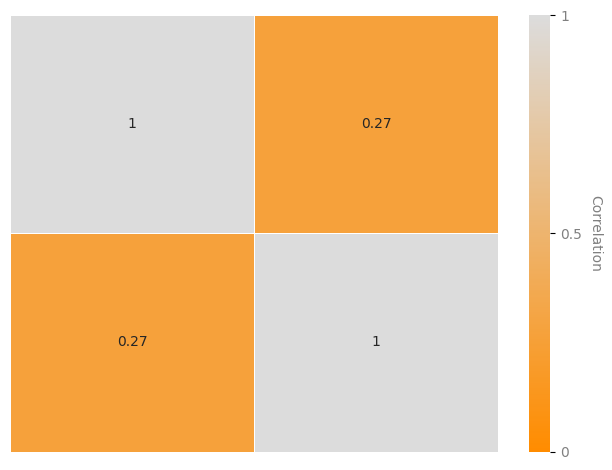

In [103]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LinearSegmentedColormap

# Calculate the correlation matrix
corr_matrix = df_merged[['base_price(after_promo)', 'quantity_sold(after_promo)']].corr()

# Custom continuous color map from dark orange to gainsboro
cmap = LinearSegmentedColormap.from_list("darkorange_to_gainsboro", ["darkorange", "gainsboro"], N=256)

# Plot the heatmap with the custom color map
ax = sns.heatmap(corr_matrix, annot=True, cmap=cmap, cbar=True, linewidths=0.5, linecolor='white', vmin=0, vmax=1)

# Customize the color bar
cbar = ax.collections[0].colorbar  # Access the color bar from the heatmap
cbar.set_label('Correlation', rotation=270, labelpad=15, color='grey')  # Label for the color bar with grey color
cbar.set_ticks([0, 0.5, 1])  # Set ticks at 0, 0.5, and 1
cbar.set_ticklabels(['0', '0.5', '1'])  # Set the tick labels
cbar.ax.tick_params(labelcolor='grey')  # Set the color of the tick labels to grey

# Remove axis labels and ticks
plt.xticks([])
plt.yticks([])

# Remove the title
plt.title('')  # No title

plt.tight_layout()
plt.show()


Base price and quantity sold show a weak positive correlation, indicating that changes in price don’t significantly impact the quantity sold